## Overview

This example uses micromlp to create a simple binary classifier from the scikit learn moons dataset.

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from micromlp import MLP, Layer
from micromlp.activations import relu, softmax
from micromlp.losses import cross_entropy

## Create Dataset

We begin by creating the dataset using scikit learn. We will also plot it then convert the outputs from integer to one-hot encoding for training the network.

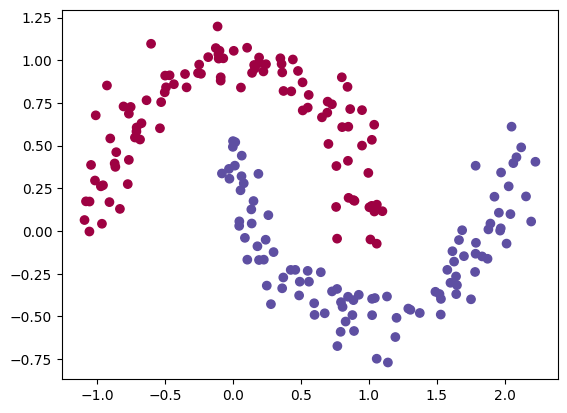

In [2]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.1)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# create one-hot encoding of y
x_train, y_train = x[:150], np.eye(2)[y[:150]]
x_test, y_test = x[150:], np.eye(2)[y[150:]]

## Create Model

We will create our model with an input layer of size 2, two hidden layers of size 32 with the relu activation function, and an output layer of size 2 with the softmax activation function.

In [4]:
model = MLP([
    Layer(2, 32, relu),
    Layer(32, 32, relu),
    Layer(32, 2, softmax),
])

## Train Model

We will now train the model off the dataset with the cross entropy loss function.

In [5]:
model.train(x_train, y_train, loss=cross_entropy, epochs=20, batch_size=16, learning_rate=0.2)

Epoch 0: Avg Loss 2.535147157192966
Epoch 1: Avg Loss 0.3299357766973098
Epoch 2: Avg Loss 0.094268844777981
Epoch 3: Avg Loss 0.0363233305841413
Epoch 4: Avg Loss 0.023808445433346977
Epoch 5: Avg Loss 0.016006036543749973
Epoch 6: Avg Loss 0.010233752853515498
Epoch 7: Avg Loss 0.008724087063150452
Epoch 8: Avg Loss 0.007551979981339865
Epoch 9: Avg Loss 0.006640635053783496
Epoch 10: Avg Loss 0.005947427361530148
Epoch 11: Avg Loss 0.0052695528308447795
Epoch 12: Avg Loss 0.004830710071294902
Epoch 13: Avg Loss 0.004428139890327164
Epoch 14: Avg Loss 0.0041138366423302515
Epoch 15: Avg Loss 0.0037613635083843856
Epoch 16: Avg Loss 0.0034891533475477163
Epoch 17: Avg Loss 0.0032464215565969883
Epoch 18: Avg Loss 0.003031056294020591
Epoch 19: Avg Loss 0.0028429503305562437


## Evaluate Model

Now that we have trained our model, we can use it to generate predictions. We will compare the actual and predicted classifications for the first few samples in our test dataset.

In [6]:
y_pred = list(map(model, x_test))
for actual, predicted in zip(y_test[:10 ], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted.round(3)}")

Actual: [1. 0.], Predicted: [0.992 0.008]
Actual: [1. 0.], Predicted: [0.999 0.001]
Actual: [0. 1.], Predicted: [0.002 0.998]
Actual: [0. 1.], Predicted: [0. 1.]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [0. 1.], Predicted: [0. 1.]
Actual: [0. 1.], Predicted: [0.003 0.997]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [0. 1.], Predicted: [0. 1.]


We can also calculate what percent of samples in the test dataset got classified correctly by our model.

In [7]:
accuracy = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


And for fun, we can generate a grid of points over the domain of our samples, and see the model's estimates and confidence over the entire domain.

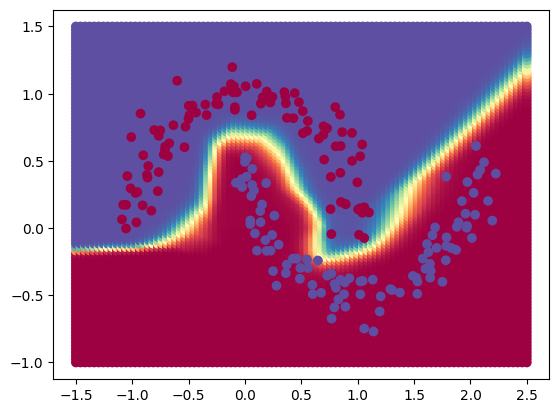

In [8]:
points = np.array([[x, y] for x in np.linspace(-1.5, 2.5, 100) for y in np.linspace(-1, 1.5, 100)])
values = np.array([model(point) for point in points])

plt.scatter(points[:, 0], points[:, 1], c=values[:,0], cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()